In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import circlify as circlify
import plotly.express as px
import numpy as np

import kaleido

# Dimensions:
* Country
* Country (Location)
* Sector
* Sector (Spending)
* Total Spending
* Time

In [415]:
# Non-Major European Countries
non_major_european_countries = [
    "Latvia", "Lithuania", "Estonia",
    "Albania", "Bosnia and Herzegovina", "Croatia", "Montenegro", "North Macedonia", "Serbia",
    "Czech Republic", "Hungary", "Slovakia", "Slovenia",
    "Denmark", "Finland", "Norway", "Sweden",
    "Bulgaria", "Romania"
]

# Non-Major South American Countries
non_major_south_american_countries = [
    "Bolivia", "Ecuador", "Peru",
    "Guyana", "Suriname",
    "Paraguay", "Uruguay"
]

# African Countries
african_countries = [
    "Algeria", "Egypt", "Libya", "Morocco", "Tunisia",
    "Ethiopia", "Kenya", "Tanzania", "Uganda",
    "Ghana", "Nigeria", "Senegal",
    "Angola", "Mozambique", "Zambia", "Zimbabwe"
]

# South Asian Countries
south_asian_countries = [
    "Bangladesh", "Nepal", "Sri Lanka",
    "Bhutan", "Maldives"
]



In [416]:
world_df = pd.read_csv("WorldExpenditures.csv", index_col=0)
non_top_20 = world_df.groupby("Country").sum().sort_values("Expenditure(million USD)", ascending=False).iloc[20:].index.tolist()
non_top_20 = [country for country in non_top_20 if country not in non_major_european_countries + non_major_south_american_countries + african_countries + south_asian_countries]

non_major_european_df = world_df[world_df["Country"].isin(non_major_european_countries)]
non_major_south_american_df = world_df[world_df["Country"].isin(non_major_south_american_countries)]
non_major_african_df = world_df[world_df["Country"].isin(african_countries)]
non_major_south_asian_df = world_df[world_df["Country"].isin(south_asian_countries)]
non_top_20_df = world_df[world_df["Country"].isin(non_top_20)]
world_df = world_df[~world_df["Country"].isin(non_major_european_countries + non_major_south_american_countries + african_countries + south_asian_countries + non_top_20)]


# non_major_european_df = non_major_european_df[non_major_european_df["Sector"] == "Total function"]
# non_major_south_american_df = non_major_south_american_df[non_major_south_american_df["Sector"] == "Total function"]
# non_major_african_df = non_major_african_df[non_major_african_df["Sector"] == "Total function"]
# non_major_south_asian_df = non_major_south_asian_df[non_major_south_asian_df["Sector"] == "Total function"]
# non_top_20_df = non_top_20_df[non_top_20_df["Sector"] == "Total function"]

non_major_european_df = non_major_european_df.groupby(["Year","Sector"]).sum().reset_index()
non_major_south_american_df = non_major_south_american_df.groupby(["Year","Sector"]).sum().reset_index()
non_major_african_df = non_major_african_df.groupby(["Year","Sector"]).sum().reset_index()
non_major_south_asian_df = non_major_south_asian_df.groupby(["Year","Sector"]).sum().reset_index()
non_top_20_df = non_top_20_df.groupby(["Year","Sector"]).sum().reset_index()

non_major_european_df["Country"] = "Non-Major European"
non_major_south_american_df["Country"] = "Non-Major South American"
non_major_african_df["Country"] = "African"
non_major_south_asian_df["Country"] = "South Asian"
non_top_20_df["Country"] = "Other"

world_df = pd.concat([world_df, non_major_european_df, non_top_20_df], ignore_index=True)




world_df.head(1)

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\2175733668.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\2175733668.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\2175733668.py:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\2175733668.py:21: FutureWarning:


,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,153122.633,37.36193


In [417]:
sectors = world_df[(world_df["Country"] == "United States of America") & (world_df["Year"] == 2020)]["Sector"]
sectors.drop(sectors.index[0], inplace=True)
sectors.drop(sectors.index[8], inplace=True)

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\481683935.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\commo\AppData\Local\Temp\ipykernel_10836\481683935.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 2020 Circular Packing Plot (Top 3 Largest Industries)

In [418]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'].isin(sectors)]
current_world_df.head(1)

,Year,Country,Sector,Expenditure(million USD),GDP(%)
6006,2020,Australia,Environment protection,13887.005,0.96995


In [419]:
current_world_pivot_df = current_world_df.pivot(index='Country', columns='Sector', values='Expenditure(million USD)')
totals = current_world_pivot_df.sum(axis=1)
current_world_pivot_df.fillna(1, inplace=True)
current_world_pivot_df.head()

Sector,Defence,Education,Environment protection,General public services,Health,Housing and community amenities,Public order and safety,Social protection
Country,,,,,,,,
Australia,35494.135,87142.177,13887.005,52395.417,117574.668,9703.492,30687.810,168762.997
Austria,2682.893,22129.364,1801.734,26749.490,39691.258,1244.468,6209.892,99082.074
Belgium,4726.293,34496.721,7594.005,38573.447,46319.936,2005.582,9478.400,118675.661
Brazil,15897.218,71581.610,6832.935,107109.961,90948.737,17856.801,41124.859,301640.169
Canada,16090.636,82696.774,12396.053,97560.108,160176.395,8284.665,30218.782,294121.623


In [420]:

circlify_dict = {}
circlify_dict["id"] = "World"
circlify_dict["datum"] = totals.sum()
circlify_dict["children"] = []

for country in current_world_pivot_df.index:
    country_dict = {}
    country_dict["id"] = country
    country_dict["datum"] = totals[country]
    country_dict["children"] = []
    for sector in current_world_pivot_df.columns:
        sector_dict = {}
        sector_dict["id"] = sector
        sector_dict["datum"] = current_world_pivot_df[sector][country]
        country_dict["children"].append(sector_dict)
    circlify_dict["children"].append(country_dict)
    
data = [circlify_dict]


circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


In [434]:
print(sectors.values)

['Environment protection' 'Housing and community amenities' 'Health'
 'Education' 'Social protection' 'General public services' 'Defence'
 'Public order and safety']


' \n'

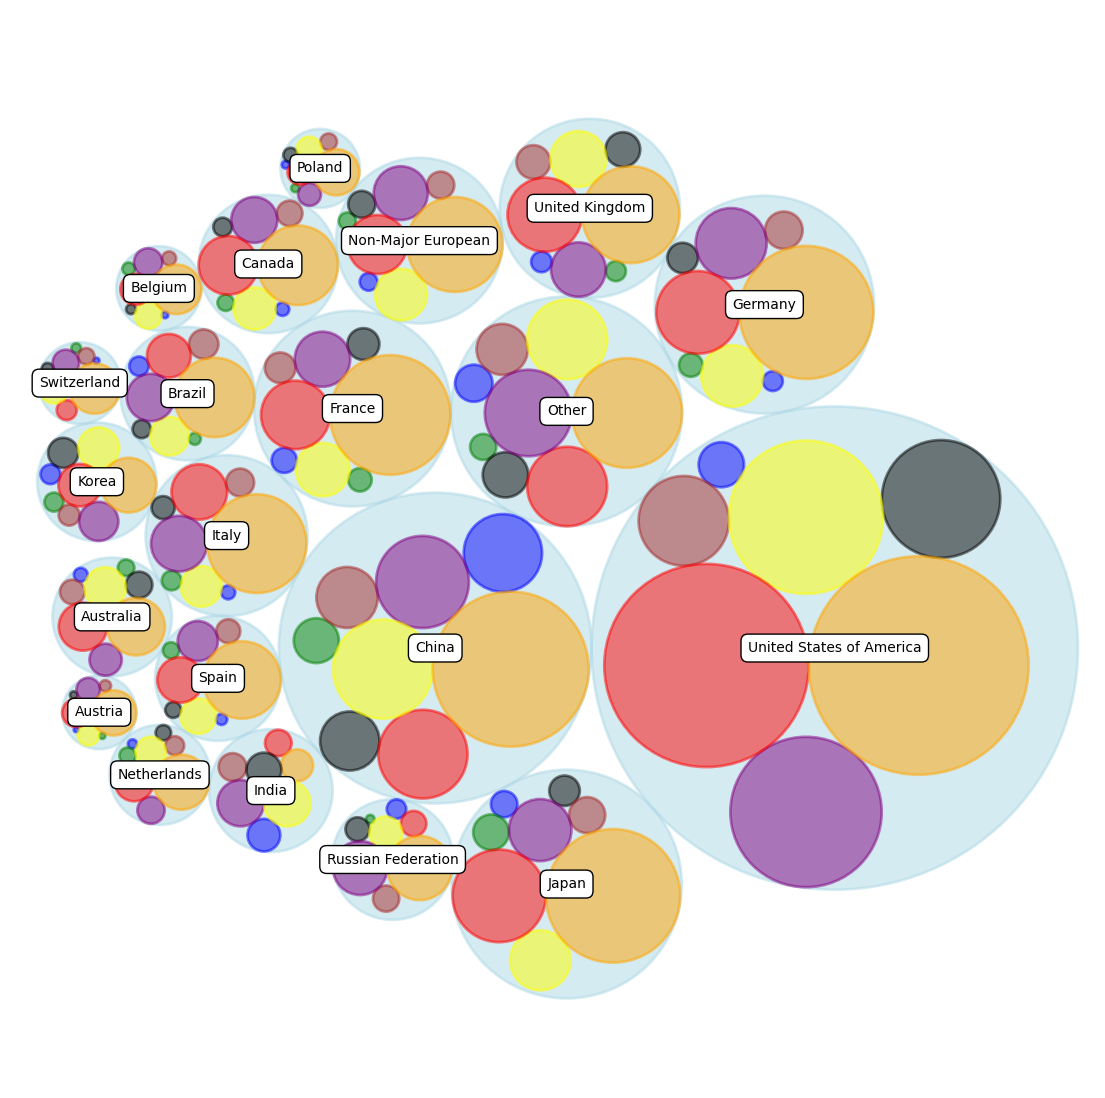

In [435]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
#ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))
    
# create a color dict based on
# change color based on label ['Environment protection' 'Housing and community amenities' 'Health' 'Education' 'Social protection' 'General public services' 'Defence' 'Public order and safety']
color_dict = {'Environment protection':'green', 'Housing and community amenities':'blue', 'Health':'red', 'Education':'yellow', 'Social protection':'orange', 'General public services':'purple', 'Defence':'black', 'Public order and safety':'brown'}

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    color = color_dict[label]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=color))
    #plt.annotate(label, (x,y ), ha='center', color="white")
 
# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
    
""" 
"""

# 2020 Treemap (Largest Economies & Happiness)

In [422]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'] != "Total function"]
current_world_df = current_world_df[current_world_df['Sector'].isin(sectors)]
current_world_df.head(1)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
6006,2020,Australia,Environment protection,13887.005,0.96995


In [423]:
fig = px.treemap(current_world_df, path=['Country', 'Sector'], values='Expenditure(million USD)')
fig.show()

# 2020 Treemap (Of Different Industries & Spending)

In [424]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'] != "Total function"]
current_world_df.head(1)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
6001,2020,Australia,"Agriculture, forestry, fishing and hunting",3896.537,0.27216


In [425]:
current_world_df[current_world_df['Country'] == 'United States of America']

,Year,Country,Sector,Expenditure(million USD),GDP(%)
6318,2020,United States of America,Environment protection,0.00,0.00000
6319,2020,United States of America,Housing and community amenities,109364.10,0.51676
6320,2020,United States of America,Health,2221081.41,10.49487
6321,2020,United States of America,Education,1263778.50,5.97150
6322,2020,United States of America,Social protection,2568403.21,12.13601
6323,2020,United States of America,General public services,1216071.99,5.74608
6324,2020,United States of America,Defence,745124.24,3.52080
6325,2020,United States of America,Public order and safety,433328.87,2.04753
6326,2020,United States of America,"Recreation, culture and religion",59250.07,0.27996


In [426]:
sector_pivot_df = pd.pivot_table(current_world_df, index='Sector', columns='Country',values='Expenditure(million USD)')
sector_pivot_df["Sector Sum"] = sector_pivot_df.sum(axis=1)
for country in sector_pivot_df.columns:
    sector_pivot_df[country] = sector_pivot_df[country] / sector_pivot_df["Sector Sum"]
sector_pivot_df = sector_pivot_df.drop(columns=['Sector Sum'])
sector_pivot_df = sector_pivot_df.loc[sectors]
sector_pivot_df.head(1)

Country,Australia,Austria,Belgium,Brazil,Canada,China,France,Germany,India,Italy,...,Korea,Netherlands,Non-Major European,Other,Poland,Russian Federation,Spain,Switzerland,United Kingdom,United States of America
Sector,,,,,,,,,,,,,,,,,,,,,
Environment protection,0.033726,0.004376,0.018443,0.016594,0.030105,0.264407,0.066499,0.064097,0.001366,0.045129,...,0.044432,0.032838,0.035036,0.081783,0.00817,0.009063,0.030574,0.010883,0.047404,0.0


In [427]:
sector_rows_df = sector_pivot_df.unstack().reset_index()
sector_rows_df

,Country,Sector,0
0,Australia,Environment protection,0.033726
1,Australia,Housing and community amenities,0.012222
2,Australia,Health,0.021802
3,Australia,Education,0.023347
4,Australia,Social protection,0.016254
...,...,...,...
163,United States of America,Education,0.338585
164,United States of America,Social protection,0.247368
165,United States of America,General public services,0.309999
166,United States of America,Defence,0.477216


In [428]:
fig = px.treemap(sector_rows_df, path=['Sector','Country'], values=0)
# make margins larger and save to svg
fig.update_layout(margin=dict(l=50, r=50, t=75, b=75))

fig.show()

# 2020 Treemap (East vs. Western Spending Industries)

# Time Ridge Plot (% Percent Change in Spending)

In [429]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [430]:
df["g"].value_counts()

A    50
B    50
C    50
D    50
E    50
F    50
G    50
H    50
I    50
J    50
Name: g, dtype: int64

<Axes: xlabel='Year', ylabel='GDP(%)'>

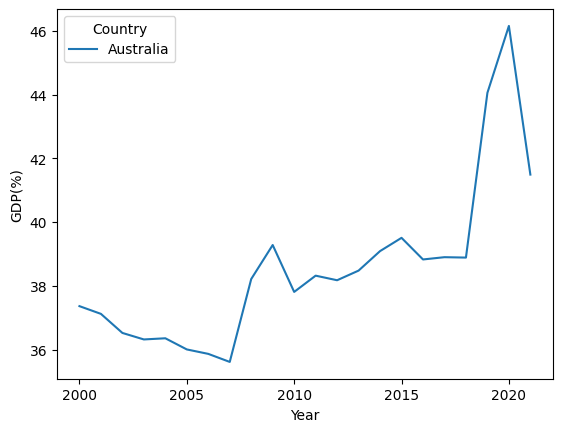

In [431]:
# line plot of year and gdp
sns.lineplot(data=world_totals_df, x="Year", y="GDP(%)", hue="Country")

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



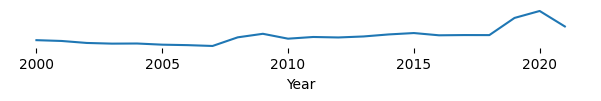

In [432]:
world_totals_df = world_df[world_df['Sector'] == "Total function"]
world_totals_df = world_totals_df[world_totals_df['Country'] == "Australia"]
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(world_totals_df, row="Country", aspect=15, height=.5, palette=pal)

g.map(sns.lineplot, "Year","GDP(%)")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Time Multiple Country Line Plots (% Percent Change in Spending)

# Time Multiple Country + Sector Stacked Plots (% Spent relative to GDP)

# Time Stacked Plot (% Spent Sector relative  to within-sector Spending)

# Time Multiple Sector Stacked Plot (% Spent Country + Sector relative to sector Spending)